## 1. Loading Packages



In [299]:
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image


In [313]:
bridges = pd.read_csv('../Data/bridge_df_cleaned.csv')

In [315]:
bridges.head()

,avg_daily_traffic,spans_units,structure_length[ft],age,deck_area[ft2],mile_point,latitude,longitud,approach_span_units,approach_width[ft],...,total_precipitation,inspection_month,inspection_year,historical_code,condition_rate,structural_appraisal,approach_alignment_appraisal,operating_rating_code,inventory_rating_code,condition_code
0,100.0,1,24.6,10,395.6,1.253,34.76984,-84.03099,0,16.1,...,1558.15,2,2019,4,Good,NaN,8,5.0,5.0,8
1,50.0,1,24.6,12,444.0,1.889,34.92981,-83.28863,0,18.0,...,1501.58,2,2019,4,Good,NaN,8,5.0,5.0,8
2,106.0,1,63.0,32,1012.7,2.051,34.94998,-83.55069,2,16.1,...,1558.15,11,2017,4,Fair,6.0,6,8.0,8.0,6
3,9290.0,3,110.9,60,8913.6,34.000,32.01841,-80.85094,0,67.9,...,NaN,6,2018,5,Fair,5.0,8,1.0,1.0,6
4,490.0,4,120.1,47,3309.3,1.000,32.00641,-80.86697,0,22.0,...,NaN,6,2018,5,Good,7.0,8,2.0,2.0,7


In [317]:
bridges.columns

Index(['avg_daily_traffic', 'spans_units', 'structure_length[ft]', 'age',
       'deck_area[ft2]', 'mile_point', 'latitude', 'longitud',
       'approach_span_units', 'approach_width[ft]', 'skew_angle[o]',
       'nav_vert_clearance', 'nav_horiz_clearance', 'route_horiz_clearance',
       'lengt_max_span[ft]', 'left_curb_width[ft]', 'right_curb_width[ft]',
       'roadway_curb_curb_width', 'min_vert_clearance_over',
       'min_vert_underclearance', 'min_right_underclearance',
       'min_left_underclearance', 'min_clearance_lift_brige',
       'operating_rating[us-tons]', 'inventory_rating[us-tons]', 'detour_dist',
       'avg_daily_truck_traffic', 'avg_daily_future_traffic',
       'length_improvement', 'improvement_cost', 'road_improvement_cost',
       'total_project_cost', 'avg_daily_truck_traffic[computed]',
       'avg_rel_humidity', 'avg_temperature', 'max_temperature',
       'mean_wind_speed', 'min_temperature', 'days_measurable_precipitation',
       'days_temp_below_0C', 'w

In [319]:
bridges_insp_date = bridges[['inspection_month','inspection_year']]


In [321]:
bridges.drop(columns=['latitude','longitud','inspection_month','inspection_year'],inplace=True)

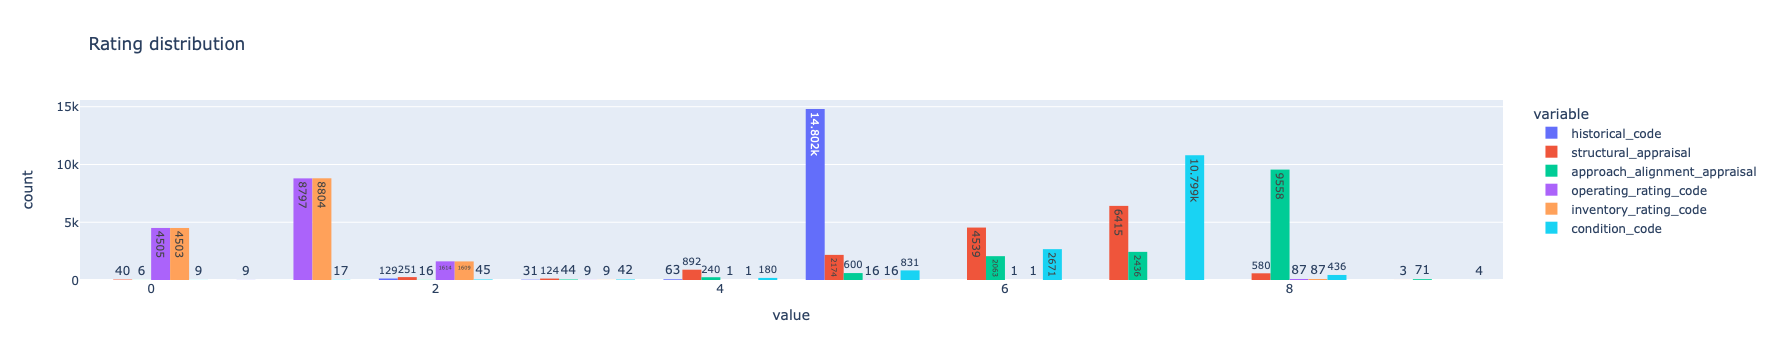

In [323]:
rating_feature_columns = ['historical_code','structural_appraisal','approach_alignment_appraisal'
                          ,'operating_rating_code','inventory_rating_code','condition_code']

#bridges[rating_feature_columns].hist()

fig = px.histogram(bridges, x=rating_feature_columns, title= 'Rating distribution', barmode='group',text_auto=True)
#newnames = {'1':'Tropical depression', '2': 'Tropical Storm', '3': 'hurricane'}
#fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
#                                      legendgroup = newnames[t.name],
#                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))

fig.show()

In [325]:
##Dropping 'inventory_rating_code' because it is the same as 'operating_rating_code' as per distribution graph above

bridges.drop(columns=['inventory_rating_code'],inplace=True)
rating_feature_columns = ['historical_code','structural_appraisal','approach_alignment_appraisal'
                          ,'operating_rating_code','condition_code']

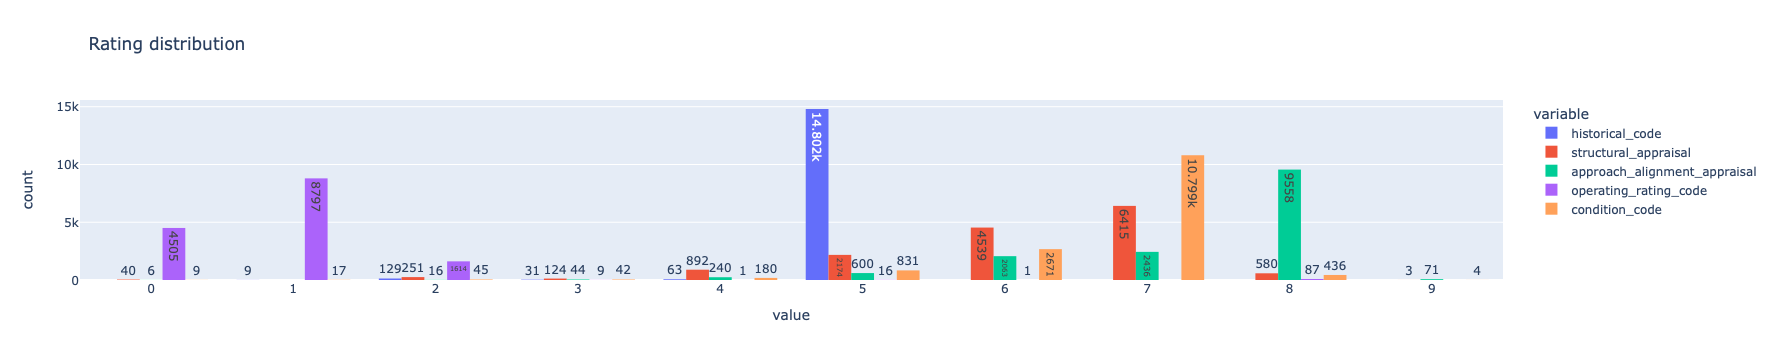

In [335]:
fig = px.histogram(bridges, x=rating_feature_columns, title= 'Rating distribution', barmode='group',nbins=10,text_auto=True)

# update layout for xaxis tickmode as linear
fig.update_layout(
   xaxis = dict(
      tickmode = 'linear',
      tick0 = 0,
      dtick = 1
   )
)

fig.show()


In [248]:
missing = pd.concat([bridges.isnull().sum(), 100*bridges.isnull().sum()/bridges.shape[0]], axis=1)
missing.columns = ['Count', '%']
missing.sort_values(by='%', ascending=False, inplace=True)

pd.set_option('display.max_rows',20)

missing_numerics = missing.select_dtypes(exclude='Catergorical')
missing_numerics[missing_numerics['Count'] >0]


TypeError: data type 'Catergorical' not understood

In [ ]:
bridges

In [ ]:
## PCA
## Correlation

In [207]:


dependent_variable = ['condition_rate']

bridge_selected_features = pd.concat([bridges[dependent_variable], bridges[rating_feature_columns]], axis=1)

bridge_selected_features.head()

,condition_rate,historical_code,structural_appraisal,approach_alignment_appraisal,operating_rating_code,inventory_rating_code,condition_code,age
0,Good,4,NaN,8,5.0,5.0,8,10
1,Good,4,NaN,8,5.0,5.0,8,12
2,Fair,4,6.0,6,8.0,8.0,6,32
3,Fair,5,5.0,8,1.0,1.0,6,60
4,Good,5,7.0,8,2.0,2.0,7,47


,Count,%
structural_appraisal,16,0.106425
operating_rating_code,4,0.026606
inventory_rating_code,4,0.026606
condition_rate,0,0.000000
historical_code,0,0.000000
approach_alignment_appraisal,0,0.000000
condition_code,0,0.000000
age,0,0.000000


In [211]:
bridge_selected_features.dropna(axis=0,inplace=True)

In [213]:
bridge_selected_features.isnull().sum()

condition_rate                  0
historical_code                 0
structural_appraisal            0
approach_alignment_appraisal    0
operating_rating_code           0
inventory_rating_code           0
condition_code                  0
age                             0
dtype: int64

In [185]:
bridge_dummies = pd.get_dummies(bridge_selected_features, columns=['condition_rate'], prefix='C')

In [187]:
bridge_dummies

,historical_code,structural_appraisal,approach_alignment_appraisal,operating_rating_code,inventory_rating_code,condition_code,C_Fair,C_Good,C_Poor
2,4,6.0,6,8.0,8.0,6,True,False,False
3,5,5.0,8,1.0,1.0,6,True,False,False
4,5,7.0,8,2.0,2.0,7,False,True,False
5,5,5.0,8,1.0,1.0,5,True,False,False
6,5,7.0,8,3.0,3.0,7,False,True,False
...,...,...,...,...,...,...,...,...,...
15029,1,7.0,8,1.0,1.0,7,False,True,False
15030,5,8.0,8,0.0,0.0,8,False,True,False
15031,5,8.0,8,1.0,1.0,8,False,True,False
15032,5,7.0,6,1.0,1.0,7,False,True,False


In [221]:
# Model (can also use single decision tree)

def randomforesttree(df,data_values, label_values,data_names, label_names):

    model = RandomForestClassifier(n_estimators=7)

    X = df[data_values]

    y = df[label_values].values

    names = names_array

    # Train
    model.fit(X, y)

    # Extract single tree
    estimator = model.estimators_[5]

    # Export as dot file
    export_graphviz(estimator, out_file='tree.dot', 
                    feature_names = data_names,
                    class_names = label_names,
                    rounded = True, proportion = False, 
                    precision = 2, filled = True)

    # Convert to png using system command (requires Graphviz)

    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

    # Display in jupyter notebook

    return Image(filename = 'tree.png')



